**PROBLEM**

$$-\Delta u = f, \quad \text{in } \Omega \\ u = u_D, \quad \text{on } \partial \Omega $$

where:
- the domain is the unit square: $\Omega = [0,1]\times [0,1]$;
- the source term is a constant: $f = 6$;
- the exact solution (used also as the Dirichlet BC $u_D$) is known: $u_{ex} = 1+x^2+2y^2$ 

In [1]:
from IPython.core.display import clear_output
#Import packages
try:
    import dolfin as df
except ImportError:
    !wget "https://fem-on-colab.github.io/releases/fenics-install.sh" -O "/tmp/fenics-install.sh" && bash "/tmp/fenics-install.sh"
    import dolfin as df

import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
clear_output()

In [5]:
#Domain and mesh
mesh = df.UnitSquareMesh(8,8)
mesh2 = df.RectangleMesh(0,0,1,2,8,8)
df.plot(mesh2)

TypeError: ignored

In [ ]:
#Finite element function space
R = 1 #degree of the polynomal
V = df.FunctionSpace(mesh, 'P', R)

In [ ]:
#Boundary condition
def boundary (x, on_boundary):
  return on_boundary

uD = df.Expression('1+  x[0]*x[0] + 2*x[1]*x[1]', degree=4)
bc = df.DirichletBC(V, uD, boundary)

In [ ]:
#Weak formulation
uh = df.TrialFunction(V)
vh = df.TestFunction(V)
f = df.Constant(6)

a = df.dot(df.grad(uh),df.grad(vh)) *df.dx
F = f*vh * df.dx

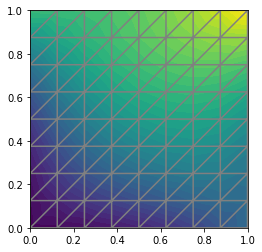

In [ ]:
#Solve
u = df.Function(V)
df.solve(a==F, u, bc)

#Plot the solution on the domain
df.plot(u)
df.plot(mesh)

In [ ]:
#Errors
uEX = uD  #exact solution
err_L2 = df.errornorm(uEX, u, 'L2')
err_H1 = df.errornorm(uEX, u, 'H1')
error = pd.DataFrame([err_L2, err_H1], index=['L2', 'H1'], columns=['error'])
print(error)



       error
L2  0.482446
H1  2.252046
